#***SEHUNDO PARCIAL - METODOS NUMERICOS***

#**Ejercicio 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Grafica**

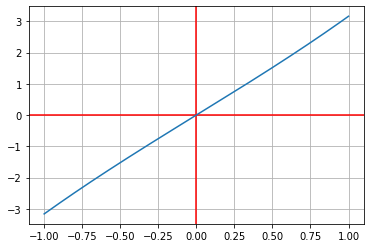

In [2]:
plt.axvline(0, color='r')   # Eje de las ordenadas
plt.axhline(0, color='r')   # Eje de las abscisas

x = np.linspace(-1, 1, 300)                       #Donde empieza ; Donde acabca ; Cantidad de Segmentos que tendra               
y = x*np.sqrt(x**2+9)                             #Funcion "Aqui se cambia"
plt.plot(x, y)

plt.grid()
plt.show()

**Metodos de Rectangulos**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.linspace(-1,1,20)                      #Donde incia; Donde acaba ; Cantidad de Rectangulos que tiene para excatitud
y =x*np.sqrt(x**2+9)                         
y1 = y[0:-1]
dx = x[1] - x[0]                             # Ancho de cada rectángulo
fArea = dx*np.sum(y1)                        # Rectángulo ancho * alto, luego suma
print("Integral area:",fArea)

Integral area: -0.33287133264930346


**Metodos Trapecios**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = np.linspace(-1,1,20)                    #Donde inicia; Donde acaba ; Cantidad de Trapecios para exactitud
y =  x*np.sqrt(x**2+9)                    
y1 = y[1:-1]
dx = x[1] - x[0]                            # Ancho de cada trapecio
fsum1 = np.sum(2*y1)                        #Solo multiplica los internos y por eso agarra solo la parte de "y1"
fsum = fsum1 + y[0] + y[-1]                 #Suman los valores de "a" y la imagen de "f(b)""
fArea = (dx/2)*fsum                         # suma de areas del trapecio
print("Integral Area:" ,fArea)

Integral Area: -2.8047739569477637e-16


**Error**

In [7]:
import scipy.integrate as integrate        #Importar la Libreria SPICY  / #Siempre primero hacer correr esto, osino sale error.
                                           #Numpy = Maneja arreglos y vectores
import   math                              #Importar Libreria MATH

In [8]:
#Integral por el Metodo QUAD                                        #Integrate = es la Libreria Spicy, que le hicimos el cambio de nombre.
res = integrate.quad(lambda x: x*np.sqrt(x**2+9), -1, 1)             #quad = Es el metodo por el que vamos a resolver.
                                                                    #lambda = significa o da a entender que es una Funcion.
print("Resultado de la Integral es:" ,res)                          #Muestra el resultado primero y a lado el error.

#Cuando introducimos la funcion en la misma linea se pone la palabra "LAMBDA"

Resultado de la Integral es: (0.0, 3.409126508521985e-14)


#***Ejercicio 2***

**Metodo de Monte Carlo**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Monte Carlos es un metodo computacional

N = 7000000                                         #Este metodo necesita que uno ponga numeros grandes, para que tenga mas exactitud
# limite inferior
a = np.sqrt(3)                                       #"Cambia el limite inferior de la Integral"                   
# limite superior
b = 1                                               #"Cambia el Limite superior de la Integral"
x = np.random.uniform(a, b, N)                      #El punto es aleatorio, en cualquier lugar / Es un elemento probabilistico 
                                                    #Saca una distribucion uniforme, como una campana de GAUSS
y = 1/(1+x**2)                

sumfx = np.sum(y)
farea = ((b - a) / N) * sumfx
print("El área es: ", farea)

El área es:  -0.26178489788714593


#***Ejercicio 3***

In [15]:
from numpy import array, zeros, diag, diagflat, dot

In [20]:
def jacobi(A,b,N=25,x=None):                                  #En JACOBI ya esta hecho esto y no se debe de cambiar nada de aqui....
    """ AX=B - Jacobi Método Iterativo. """
    # Crear la conjetura (hipótesis, supuesto) inicial
    # Si se necesita
    if x is None:
        x = zeros(len(A[0]))                                  #len=pide la longitud del vector / Genera una matriz de ceros [0. , 0. , 0., ]

    # Crear una matriz diagonalizada de A
    D = diag(A)                                              #diag = agarra los elementos de la diagonal
    R = A - diagflat(D)                                      #diagdlat = genera una matriz diagonal con esos elmentos 
                                                             #Le resta A para que asi sea con zeros y seia la matriz R
    # Iteración por N veces 
    for i in range(N):
        x = (b - dot(R,x)) / D                                #dot = es el producto o la multiplicacion 
    return x

In [63]:
A = array([[3., -1., 1.], [2., 5., -2.], [1., -1., -3.]])                     #Tenemos que Ordenadar con la matriz dominante /#"Se Cambia"
b = array([4., -6., 6.])                                                      #Lado derecho de lo que es igualado la matriz  /#"Se Cambia"
 
sol = jacobi(A,b,N=30)    

In [65]:
print("A:")
print(A)
print("b:")
print(b)
print("x:")
print(sol)
print("Tolerancia")
print(1-np.absolute(sol-1/sol))

A:
[[ 3. -1.  1.]
 [ 2.  5. -2.]
 [ 1. -1. -3.]]
b:
[ 4. -6.  6.]
x:
[ 1.00000072 -2.00000064 -1.00000019]
Tolerancia
[ 0.99999855 -0.5000008   0.99999962]
